In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')

In [3]:
housing_data = housing_data.dropna()

In [4]:
housing_data.shape

(20433, 10)

In [5]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [6]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [7]:
housing_data.shape

(19475, 10)

In [8]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [10]:
housing_data.shape

(19475, 14)

In [11]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3135,-117.68,35.03,28.0,2969.0,648.0,1644.0,570.0,3.4338,54900.0,0,1,0,0,0
13804,-117.55,34.25,39.0,1578.0,317.0,872.0,322.0,4.5550,153100.0,0,1,0,0,0
1970,-120.62,38.71,10.0,6305.0,1150.0,2597.0,921.0,4.0197,132200.0,0,1,0,0,0
13004,-121.27,38.67,15.0,1701.0,346.0,723.0,352.0,3.8906,128700.0,0,1,0,0,0
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,157900.0,1,0,0,0,0


In [12]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [13]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [16]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [18]:
print("Training_score: ", linear_model.score(x_train, y_train))

Training_score:  0.6169621726202106


In [20]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

### Coeficient

In [21]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

ocean_proximity_INLAND       -1.329321e+18
ocean_proximity_NEAR BAY     -1.329321e+18
ocean_proximity_<1H OCEAN    -1.329321e+18
ocean_proximity_NEAR OCEAN   -1.329321e+18
ocean_proximity_ISLAND       -1.329321e+18
longitude                    -2.369160e+04
latitude                     -2.183174e+04
population                   -3.016912e+01
total_rooms                  -8.088278e+00
households                    4.128767e+01
total_bedrooms                9.692441e+01
housing_median_age            9.102627e+02
median_income                 3.913482e+04
dtype: float64

### Predict

In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
6683,226816.0,321100.0
15863,293120.0,298300.0
12799,57600.0,81400.0
671,192000.0,194600.0
5758,212480.0,256300.0
888,367872.0,442900.0
1663,258816.0,312600.0
12315,85760.0,103100.0
3897,234496.0,209000.0
8544,172288.0,275000.0


### Evaluate Model by calculating r2

In [26]:
from sklearn.metrics import r2_score
print("Testing_score: ", r2_score(y_test, y_pred))

Testing_score:  0.5957357843025937


### Create Scater plot to compare Actual and Prerdicted

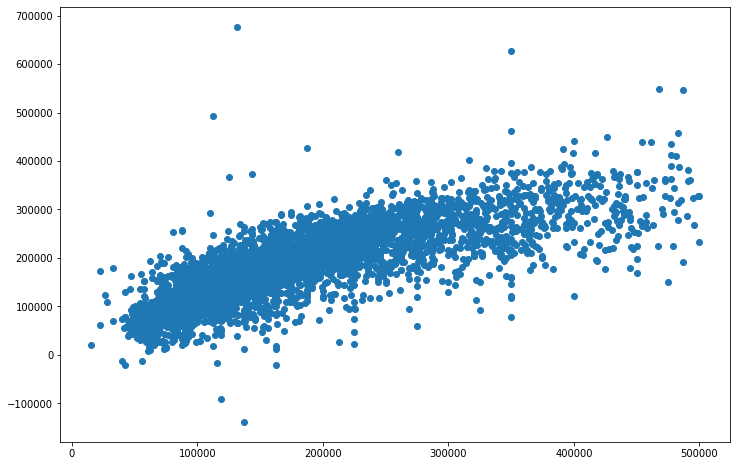

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.show()

### Sample 100 predictions for line graphing

In [33]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()
df_pred_actual_sample.head()

,index,predicted,actual
0,6438,94976.0,226000.0
1,17403,165632.0,98500.0
2,6740,282624.0,359900.0
3,9428,228096.0,200000.0
4,4339,126208.0,210000.0


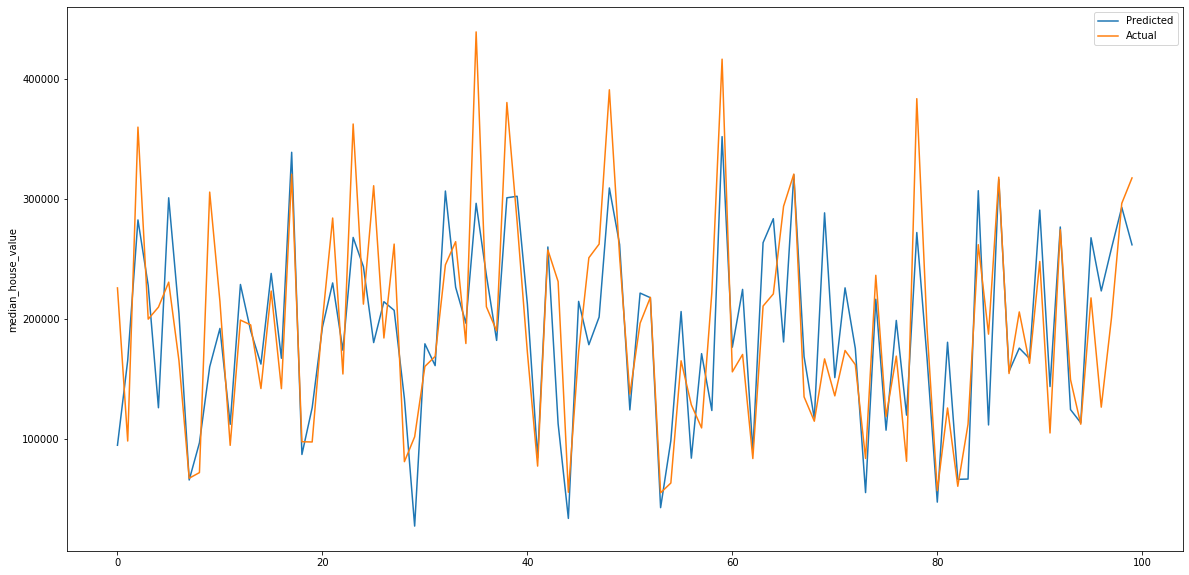

In [34]:
plt.figure(figsize=(20, 10))
plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')
plt.ylabel('median_house_value')
plt.legend()
plt.show()